In [93]:
import pandas as pd #para manejar el dataframe
import numpy as np #para abrir el csv
import matplotlib.pyplot as plt #para graficar 
import sklearn as sk #para normalizar los datos
from sklearn.cluster import KMeans

In [92]:
df = pd.read_csv("2011_clustering.csv", low_memory = False, encoding='latin')
df.head()

,Unnamed: 0,cd_a,con,d_sem,eda,ent,fac,h_mud,n_ent,n_hog,...,p9n2,p9n3,p9n4,p9n5,p9n6,p9n9,per,upm,ur,v_sel
0,0,1,501,101,50,9,1776,0,4,1,...,99,99,99,99,99,99,111,15769,1,1
1,1,1,501,101,81,9,1776,0,4,1,...,99,99,99,99,6,99,111,15769,1,1
2,2,1,501,101,21,9,1776,0,4,1,...,99,99,99,99,99,99,111,15769,1,1
3,3,1,501,101,38,9,1776,0,4,1,...,99,99,99,99,99,99,111,15769,1,4
4,4,1,501,101,51,9,1776,0,4,1,...,99,99,99,99,99,99,111,15769,1,4


In [94]:
df.shape

(1234476, 150)

In [95]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)], axis = 1)

,cd_a,con,d_sem,eda,ent,fac,h_mud,n_ent,n_hog,n_inf,...,p9n2,p9n3,p9n4,p9n5,p9n6,p9n9,per,upm,ur,v_sel
0,1,501,101,50,9,1776,0,4,1,1,...,99,99,99,99,99,99,111,15769,1,1
1,1,501,101,81,9,1776,0,4,1,1,...,99,99,99,99,6,99,111,15769,1,1
2,1,501,101,21,9,1776,0,4,1,1,...,99,99,99,99,99,99,111,15769,1,1
3,1,501,101,38,9,1776,0,4,1,2,...,99,99,99,99,99,99,111,15769,1,4
4,1,501,101,51,9,1776,0,4,1,2,...,99,99,99,99,99,99,111,15769,1,4
5,1,501,101,15,9,1776,0,4,1,2,...,99,99,99,99,99,99,111,15769,1,4
6,1,502,101,17,9,896,0,4,1,1,...,99,99,99,99,6,99,111,32604,1,1
7,1,502,101,38,9,896,0,4,1,1,...,99,99,99,99,99,99,111,32604,1,2
8,1,502,101,30,9,896,0,4,1,1,...,99,99,99,99,6,99,111,32604,1,2
9,1,502,101,58,9,896,0,4,1,3,...,99,99,99,99,99,99,111,32604,1,3


In [96]:
df = sk.preprocessing.normalize(df, norm='l2', axis=1, copy=True)

In [97]:
df = pd.DataFrame(df)

In [98]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.000000,0.000063,0.031477,0.006346,0.003141,0.000565,0.111582,0.0,0.000251,0.000063,...,0.006220,0.006220,0.006220,0.006220,0.006220,0.006220,0.006974,0.990727,0.000063,0.000063
1,0.000062,0.000062,0.030992,0.006248,0.005011,0.000557,0.109863,0.0,0.000247,0.000062,...,0.006124,0.006124,0.006124,0.006124,0.000371,0.006124,0.006866,0.975469,0.000062,0.000062
2,0.000123,0.000061,0.030770,0.006203,0.001290,0.000553,0.109078,0.0,0.000246,0.000061,...,0.006080,0.006080,0.006080,0.006080,0.006080,0.006080,0.006817,0.968499,0.000061,0.000061
3,0.000188,0.000063,0.031478,0.006346,0.002388,0.000565,0.111588,0.0,0.000251,0.000063,...,0.006220,0.006220,0.006220,0.006220,0.006220,0.006220,0.006974,0.990785,0.000063,0.000251
4,0.000251,0.000063,0.031478,0.006346,0.003204,0.000565,0.111585,0.0,0.000251,0.000063,...,0.006220,0.006220,0.006220,0.006220,0.006220,0.006220,0.006974,0.990757,0.000063,0.000251


In [99]:
df.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
5      float64
6      float64
7      float64
8      float64
9      float64
10     float64
11     float64
12     float64
13     float64
14     float64
15     float64
16     float64
17     float64
18     float64
19     float64
20     float64
21     float64
22     float64
23     float64
24     float64
25     float64
26     float64
27     float64
28     float64
29     float64
        ...   
120    float64
121    float64
122    float64
123    float64
124    float64
125    float64
126    float64
127    float64
128    float64
129    float64
130    float64
131    float64
132    float64
133    float64
134    float64
135    float64
136    float64
137    float64
138    float64
139    float64
140    float64
141    float64
142    float64
143    float64
144    float64
145    float64
146    float64
147    float64
148    float64
149    float64
Length: 150, dtype: object

In [100]:
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

In [101]:
np.random.seed(0)

batch_size = 45
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

In [102]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

In [103]:
mbk = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0

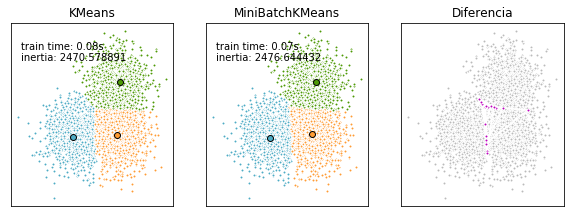

In [104]:
fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis=0)
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)
order = pairwise_distances_argmin(k_means_cluster_centers,
                                  mbk_means_cluster_centers)
# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
    t_batch, k_means.inertia_))

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == order[k]
    cluster_center = mbk_means_cluster_centers[order[k]]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('MiniBatchKMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, 'train time: %.2fs\ninertia: %f' %
         (t_mini_batch, mbk.inertia_))

# Initialise the different array to all False
different = (mbk_means_labels == 4)
ax = fig.add_subplot(1, 3, 3)

for k in range(n_clusters):
    different += ((k_means_labels == k) != (mbk_means_labels == order[k]))

identic = np.logical_not(different)
ax.plot(X[identic, 0], X[identic, 1], 'w',
        markerfacecolor='#bbbbbb', marker='.')
ax.plot(X[different, 0], X[different, 1], 'w',
        markerfacecolor='m', marker='.')
ax.set_title('Diferencia')
ax.set_xticks(())
ax.set_yticks(())

plt.show()